In [1]:
%pylab inline
from sci378 import *
from lmfit import *

Populating the interactive namespace from numpy and matplotlib
Version:  0.0.18


In [2]:
#trying the big fancy loop...11 models, 97 data points per trial, 265 trials...should be interesting

In [3]:
def Weibull(t,Linf=1,β=1,k=1,δ=1):
    return Linf - (Linf-β)*exp(-(k*t)**δ)

In [4]:
def Morgan_Mercer_Flodin(t,Linf=1,β=1,k=1,δ=1):
    return Linf - (Linf-β)/(1+(k*t)**δ)

In [5]:
def Gompertz_3(t,Linf=1,k=1,l=1):
    return Linf*(exp(exp(-k*(t-l))))

In [6]:
def Gompertz_4(t,A=1,B=1,k=1,l=1):
    return A+B*exp(exp(-k*(t-l)))

In [7]:
def Janoschek(t,Linf=1,β=1,k=1,δ=1):
    return Linf - (Linf-β)*exp(-k*t**δ)

In [8]:
def Richard_4(t,Linf=1,δ=1,k=1,γ=1):
    return Linf*(1+(δ-1)*exp(-k*(t-γ)))**(1/(1-δ))

In [9]:
def Richard_5(t,β=1,T=1,tm=1,k=1,Linf=1):
    return β+Linf/(1+T*exp(-k*(t-tm))**(1/T))

In [10]:
def Exponential(t,Linf=1,β=1,k=1):
    return Linf - (Linf - β)*exp(-(k*t))

In [11]:
def Von_Bertalanffy(t,Linf=1,K=1,to=1):
    return Linf*(1-exp(-K*(t-to)))

In [12]:
def Log_3(t,Linf=1,k=1,l=1):
    return Linf/(1 + exp(-k*(t-l)))

In [13]:
def Log_4(t,α=1,Linf=1,k=1,δ=1):
    return α+(Linf-α)/(1+exp((k-t)/δ))

In [14]:
def do_all_my_fits(t,y):
    
    weibullModel=Model(Weibull)
    params_Weibull=weibullModel.make_params()
    params_Weibull['Linf']=Parameter("Linf",value=.5)
    params_Weibull['β']=Parameter("β",value=.1)
    params_Weibull['k']=Parameter("k",min=0,max=2,value=.1)
    params_Weibull['δ']=Parameter("δ",value=.1)
    results_Weibull=weibullModel.fit(y, params_Weibull, t=t)
    
    mmfModel=Model(Morgan_Mercer_Flodin)
    params_MMF=mmfModel.make_params()
    params_MMF['Linf']=Parameter("Linf",value=.5)
    params_MMF['β']=Parameter("β",value=.1)
    params_MMF['k']=Parameter("k",min=0,max=2,value=.1)
    params_MMF['δ']=Parameter("δ",value=.1)
    results_MMF=mmfModel.fit(y, params_MMF, t=t)

    gompertz3Model=Model(Gompertz_3)
    params_G3=gompertz3Model.make_params()
    params_G3['Linf']=Parameter("Linf",value=-.15)
    params_G3['k']=Parameter("k",value=.1)
    params_G3['l']=Parameter("l",value=.1)
    results_G3=gompertz3Model.fit(y, params_G3, t=t)

    g4Model=Model(Gompertz_4)
    params_g4=g4Model.make_params()
    params_g4['A']=Parameter("A",value=.5)
    params_g4['B']=Parameter("B",value=.1)
    params_g4['k']=Parameter("k",value=.1)
    params_g4['l']=Parameter("l",value=.1)
    results_g4=g4Model.fit(y, params_g4, t=t)

    janModel=Model(Janoschek)
    params_Jan=janModel.make_params()
    params_Jan['Linf']=Parameter("Linf",value=.5)
    params_Jan['β']=Parameter("β",min=0,max=5*max(y),value=.1)
    params_Jan['k']=Parameter("k",min=-1,max=5*max(y),value=.1)
    params_Jan['δ']=Parameter("δ",min=0,max=2*max(y),value=.1)
    results_Jan=janModel.fit(y, params_Jan, t=t)
    
    r4Model=Model(Richard_4)
    params_r4=r4Model.make_params()
    params_r4['Linf']=Parameter("Linf",max=1,value=.5)
    params_r4['δ']=Parameter("δ",value=.1)
    params_r4['k']=Parameter("k",value=.1)
    params_r4['γ']=Parameter("γ",value=.1)
    results_r4=r4Model.fit(y, params_r4, t=t)

    r5Model=Model(Richard_5)
    params_r5=r5Model.make_params()
    params_r5['β']=Parameter("β",value=.5)
    params_r5['T']=Parameter("T",value=.1)
    params_r5['tm']=Parameter("tm",value=.1)
    params_r5['k']=Parameter("k",value=.1)
    params_r5['Linf']=Parameter("Linf",value=.1)
    results_r5=r5Model.fit(y, params_r5, t=t)

    expModel=Model(Exponential)
    params_exp=expModel.make_params()
    params_exp['Linf']=Parameter("Linf",value=.5)
    params_exp['β']=Parameter("β",value=.1)
    params_exp['k']=Parameter("k",value=.1)
    results_exp=expModel.fit(y, params_exp, t=t)
    
    vonBModel=Model(Von_Bertalanffy)
    params_vonB=vonBModel.make_params()
    params_vonB['Linf']=Parameter("Linf",value=.5)
    params_vonB['K']=Parameter("K",value=.1)
    params_vonB['to']=Parameter("to",min=0.1,max=1,value=.1)
    results_vonB=vonBModel.fit(y, params_vonB, t=t)
    
    l3Model=Model(Log_3)
    params_l3=l3Model.make_params()
    params_l3['Linf']=Parameter("Linf",value=.5)
    params_l3['k']=Parameter("k",value=.1)
    params_l3['l']=Parameter("l",value=.1)
    results_l3=l3Model.fit(y, params_l3, t=t)
    
    l4Model=Model(Log_4)
    params_l4=l4Model.make_params()
    params_l4['α']=Parameter("α",value=.5)
    params_l4['Linf']=Parameter("Linf",value=.5)
    params_l4['k']=Parameter("k",value=.1)
    params_l4['δ']=Parameter("δ",value=.1)
    results_l4=l4Model.fit(y, params_l4, t=t)
    
    return results_Weibull,results_MMF,results_G3,results_g4,results_Jan,results_r4,results_r5,results_exp,results_vonB,results_l3,results_r4

In [15]:
def do_all_my_bic(t,y):
    
    bic=[]
    
    weibullModel=Model(Weibull)
    params_Weibull=weibullModel.make_params()
    params_Weibull['Linf']=Parameter("Linf",value=.5)
    params_Weibull['β']=Parameter("β",value=.1)
    params_Weibull['k']=Parameter("k",min=0,max=2,value=.1)
    params_Weibull['δ']=Parameter("δ",value=.1)
    try:
        results_Weibull=weibullModel.fit(y, params_Weibull, t=t)
        bic.append(results_Weibull.bic)
    except ValueError:
        bic.append(np.nan)


    mmfModel=Model(Morgan_Mercer_Flodin)
    params_MMF=mmfModel.make_params()
    params_MMF['Linf']=Parameter("Linf",value=.5)
    params_MMF['β']=Parameter("β",value=.1)
    params_MMF['k']=Parameter("k",min=0,max=2,value=.1)
    params_MMF['δ']=Parameter("δ",value=.1)
    try:
        results_MMF=mmfModel.fit(y, params_MMF, t=t)
        bic.append(results_MMF.bic)
    except ValueError:
        bic.append(np.nan)

    gompertz3Model=Model(Gompertz_3)
    params_G3=gompertz3Model.make_params()
    params_G3['Linf']=Parameter("Linf",value=-.15)
    params_G3['k']=Parameter("k",value=.1)
    params_G3['l']=Parameter("l",value=.1)
    try:
        results_G3=gompertz3Model.fit(y, params_G3, t=t)
        bic.append(results_G3.bic)
    except ValueError:
        bic.append(np.nan)

    g4Model=Model(Gompertz_4)
    params_g4=g4Model.make_params()
    params_g4['A']=Parameter("A",value=.5)
    params_g4['B']=Parameter("B",value=.1)
    params_g4['k']=Parameter("k",value=.1)
    params_g4['l']=Parameter("l",value=.1)
    try:
        results_g4=g4Model.fit(y, params_g4, t=t)
        bic.append(results_g4.bic)
    except ValueError:
        bic.append(np.nan)

    janModel=Model(Janoschek)
    params_Jan=janModel.make_params()
    params_Jan['Linf']=Parameter("Linf",value=.5)
    params_Jan['β']=Parameter("β",min=0,max=5*max(y),value=.1)
    params_Jan['k']=Parameter("k",min=-1,max=5*max(y),value=.1)
    params_Jan['δ']=Parameter("δ",min=0,max=2*max(y),value=.1)
    try:
        results_Jan=janModel.fit(y, params_Jan, t=t)
        bic.append(results_Jan.bic)
    except ValueError:
        bic.append(np.nan)
    
    r4Model=Model(Richard_4)
    params_r4=r4Model.make_params()
    params_r4['Linf']=Parameter("Linf",max=1,value=.5)
    params_r4['δ']=Parameter("δ",value=.1)
    params_r4['k']=Parameter("k",value=.1)
    params_r4['γ']=Parameter("γ",value=.1)
    try:
        results_r4=r4Model.fit(y, params_r4, t=t)
        bic.append(results_r4.bic)
    except ValueError:
        bic.append(np.nan)

    r5Model=Model(Richard_5)
    params_r5=r5Model.make_params()
    params_r5['β']=Parameter("β",value=.5)
    params_r5['T']=Parameter("T",value=.1)
    params_r5['tm']=Parameter("tm",value=.1)
    params_r5['k']=Parameter("k",value=.1)
    params_r5['Linf']=Parameter("Linf",value=.1)
    try:
        results_r5=r5Model.fit(y, params_r5, t=t)
        bic.append(results_r5.bic)
    except ValueError:
        bic.append(np.nan)

    expModel=Model(Exponential)
    params_exp=expModel.make_params()
    params_exp['Linf']=Parameter("Linf",value=.5)
    params_exp['β']=Parameter("β",value=.1)
    params_exp['k']=Parameter("k",value=.1)
    try:
        results_exp=expModel.fit(y, params_exp, t=t)
        bic.append(results_exp.bic)
    except ValueError:
        bic.append(np.nan)
    
    vonBModel=Model(Von_Bertalanffy)
    params_vonB=vonBModel.make_params()
    params_vonB['Linf']=Parameter("Linf",value=.5)
    params_vonB['K']=Parameter("K",value=.1)
    params_vonB['to']=Parameter("to",min=0.1,max=1,value=.1)
    try:
        results_vonB=vonBModel.fit(y, params_vonB, t=t)
        bic.append(results_vonB.bic)
    except ValueError:
        bic.append(np.nan)
    
    l3Model=Model(Log_3)
    params_l3=l3Model.make_params()
    params_l3['Linf']=Parameter("Linf",value=.5)
    params_l3['k']=Parameter("k",value=.1)
    params_l3['l']=Parameter("l",value=.1)
    try:
        results_l3=l3Model.fit(y, params_l3, t=t)
        bic.append(results_l3.bic)
    except ValueError:
        bic.append(np.nan)
    
    l4Model=Model(Log_4)
    params_l4=l4Model.make_params()
    params_l4['α']=Parameter("α",value=.5)
    params_l4['Linf']=Parameter("Linf",value=.5)
    params_l4['k']=Parameter("k",value=.1)
    params_l4['δ']=Parameter("δ",value=.1)
    try:
        results_l4=l4Model.fit(y, params_l4, t=t)
        bic.append(results_l4.bic)
    except ValueError:
        bic.append(np.nan)
    
    return bic

In [16]:
data=pd.read_excel("allbacteriadata.xlsx")
t=data["Time"]
y=data["Batch 1"]

In [17]:
do_all_my_fits(t,y)

(<lmfit.model.ModelResult at 0x1e3c6f5ff70>,
 <lmfit.model.ModelResult at 0x1e3c6fbfd90>)

In [18]:
data=pd.read_excel("allbacteriadata.xlsx")
t=data["Time"]
y=data["Batch 1"]

results_Weibull,results_MMF,results_G3,results_g4,results_Jan,results_r4,results_r5,results_exp,results_vonB,results_l3,results_l4=do_all_my_fits(t,y)

In [19]:
do_all_my_bic(t,y)

[-1055.1221547327948,
 -1031.334607478719,
 -448.0484564868015,
 -443.4737455082982,
 -714.9515345778048,
 -985.3324474405053,
 -438.8990345289752,
 -756.7029463857584,
 -709.4561183910572,
 -873.945159609996,
 -1074.5874125462892]

In [20]:
results_Weibull.bic

-1055.1221547327948

In [21]:
S=Storage()
for i in range(1,10):
    t=data["Time"]
    y=data["Batch "+str(i)]
    S+=do_all_my_bic(t,y)
bic=S.arrays()

In [22]:
S.arrays()

(array([-1055.12215473, -1045.94557388, -1045.37357984,  -992.38973862,
        -1015.72344148, -1068.72395856, -1062.79874431, -1087.66427392,
         -992.94686759]),
 array([-1031.33460748, -1022.41995166, -1075.40079704,  -989.612302  ,
        -1037.91275535, -1082.90479191, -1095.06461451, -1094.4031959 ,
         -982.25393673]),
 array([-448.04845649, -433.75550433, -445.20293814, -433.36797906,
        -440.51519744, -438.35702975, -454.30794867, -460.54805096,
        -405.19025185]),
 array([-443.47374551, -429.18079335, -440.62822716, -428.79326808,
        -435.94048647, -433.78231877, -449.73323769, -455.97333998,
        -400.61554087]),
 array([-714.95153458, -718.25635515, -731.25565228, -736.41821404,
        -731.79276726, -749.40915078, -738.92801686, -738.69194434,
        -701.77206052]),
 array([-985.33244744, -986.33520171, -979.61702089, -950.79238034,
        -962.8839843 , -998.62450675, -968.76766609, -984.66358362,
        -926.2720346 ]),
 array([-438.899

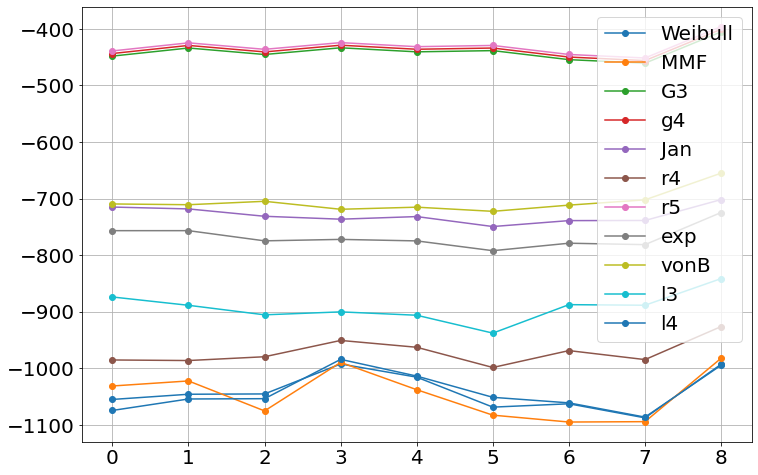

In [23]:
model_names=["Weibull","MMF","G3","g4","Jan","r4","r5","exp","vonB","l3","l4"]
bic=array(bic).T
plot(bic,'-o');
legend(model_names,loc='upper right')

In [24]:
from tqdm import tqdm

In [25]:
S=Storage()
for i in tqdm(range(1,265)):
    #load data to get t, y
    t=data["Time"]
    #name=f'Batch {i}"
    #y=data[columnname]
    y=data["Batch "+str(i)]
    S+=do_all_my_bic(t,y)


100%|████████████████████████████████████████████████████████████████████████████████| 264/264 [02:34<00:00,  1.70it/s]


In [26]:
rcParams["axes.prop_cycle"] = cycler("color", cm.tab20c.colors)

In [27]:
bic=array(S.arrays()).T
model_names=["Weibull","MMF","G3","G4","Jan","R4","R5","Exp","vonB","L3","L4"]

Text(0, 0.5, 'BIC')

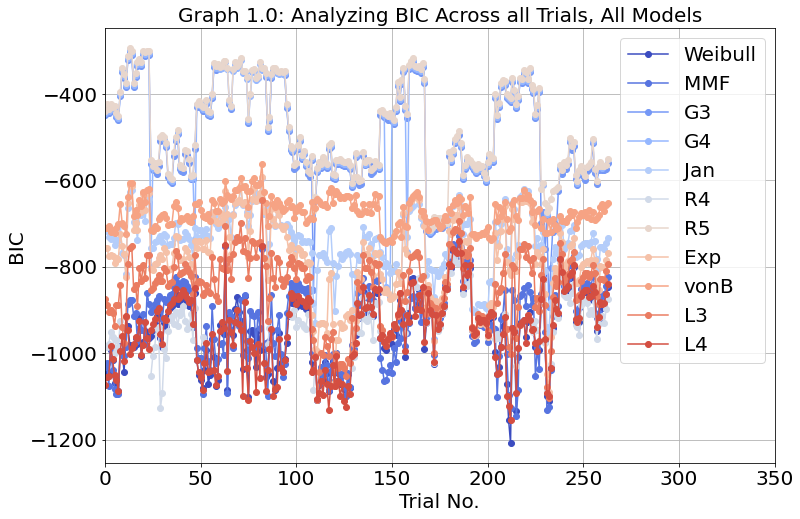

In [28]:
set_plot_colors('coolwarm',12)
plot(bic,'-o');
xlim([0,350])
legend(model_names)
title("Graph 1.0: Analyzing BIC Across all Trials, All Models")
xlabel("Trial No.")
ylabel("BIC")

In [29]:
winning_count=zeros(11)

for small_bic in bic:
    winner=argmax(small_bic)
    winning_count[winner]+=1

for n,w in zip(model_names,winning_count):
    print(n,w)

Weibull 0.0
MMF 0.0
G3 28.0
G4 64.0
Jan 0.0
R4 77.0
R5 93.0
Exp 0.0
vonB 2.0
L3 0.0
L4 0.0


In [30]:
#don't understand this hooplah^^ incorrect too you can clearly see R5 is winner for round 1